In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
train_df = pd.read_csv("US AIRLINE.csv")
train_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 14640.


In [4]:

test_df = pd.read_csv("US AIRLINE.csv")
test_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
train_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
print('Percent of missing airline_sentiment_confidence records is %.2f%%' %((train_df['airline_sentiment_confidence'].isnull().sum()/train_df.shape[0])*100))

Percent of missing airline_sentiment_confidence records is 0.00%


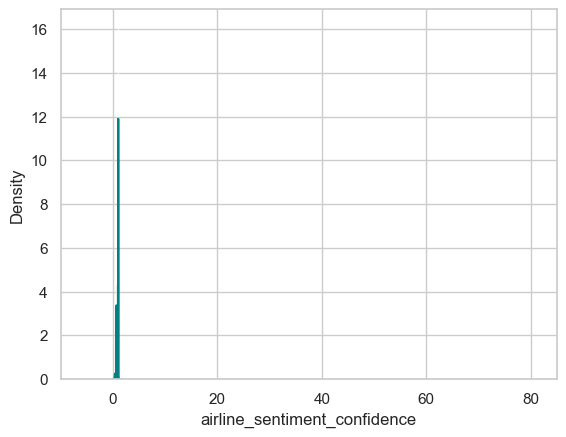

In [13]:
ax = train_df["airline_sentiment_confidence"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["airline_sentiment_confidence"].plot(kind='density', color='teal')
ax.set(xlabel='airline_sentiment_confidence')
plt.xlim(-10,85)
plt.show()

Boarded passengers grouped by port of embarkation (U = UNITED, US = US Airways, A = America):
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


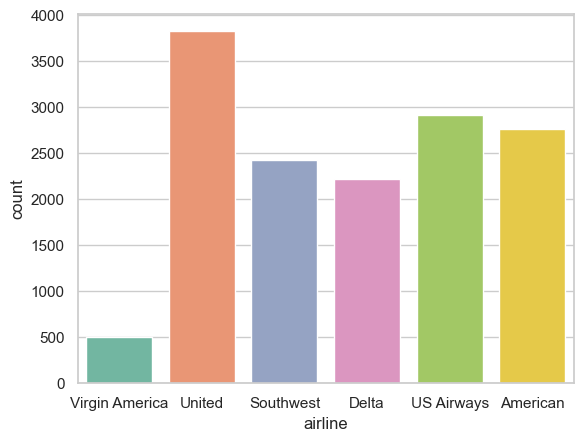

In [15]:
print('Boarded passengers grouped by port of embarkation (U = UNITED, US = US Airways, A = America):')
print(train_df['airline'].value_counts())
sns.countplot(x='airline', data=train_df, palette='Set2')
plt.show()

In [16]:
train_df.isnull().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

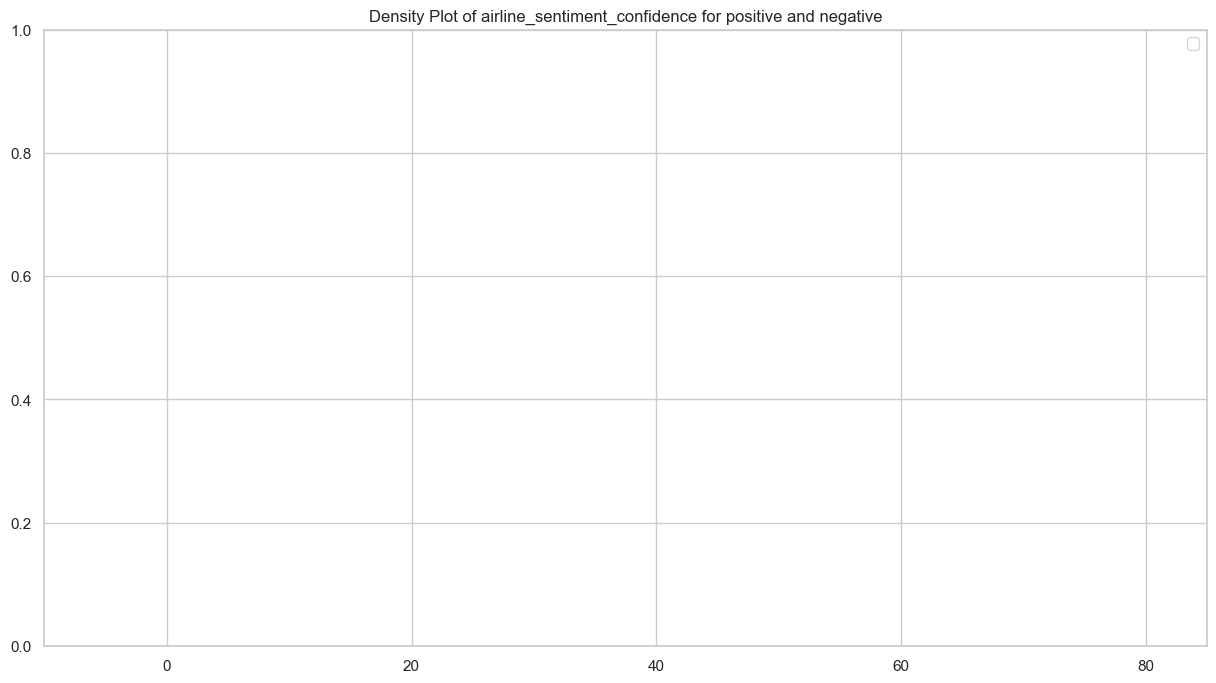

In [53]:
plt.figure(figsize=(15,8))
#ax = sns.kdeplot(final_train["airline_sentiment_confidence"][final_train.Survived == 1], color="darkturquoise", shade=True)
#sns.kdeplot(final_train["airline_sentiment_confidence"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Positive', 'Negative'])
plt.title('Density Plot of airline_sentiment_confidence for positive and negative')
ax.set(xlabel='airline_sentiment_confidence')
plt.xlim(-10,85)
plt.show()

In [54]:
train_df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [57]:
#Data exploration
train_df['airline_sentiment_confidence'].value_counts()


1.0000    10445
0.6667       71
0.6632       35
0.6596       30
0.6559       30
          ...  
0.3674        1
0.6155        1
0.3708        1
0.6905        1
0.3487        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64

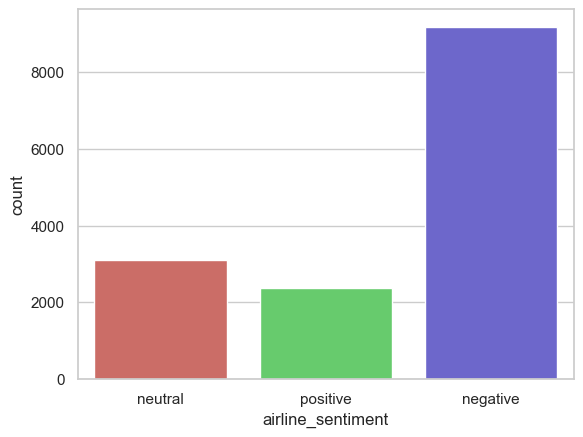

<Figure size 640x480 with 0 Axes>

In [60]:
sns.countplot(x='airline_sentiment',data=train_df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [63]:
train_df.groupby('user_timezone').mean()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
user_timezone,,,,
Abu Dhabi,5.688416e+17,0.972996,0.000000,0.000000
Adelaide,5.687349e+17,0.905757,1.000000,0.000000
Alaska,5.694273e+17,0.911095,0.651446,0.074074
America/Atikokan,5.684343e+17,0.695100,0.695100,0.000000
America/Boise,5.697220e+17,0.894367,0.795767,0.000000
...,...,...,...,...
Tokyo,5.696872e+17,1.000000,NaN,0.000000
Vienna,5.699398e+17,0.890067,0.500000,0.000000
Warsaw,5.682673e+17,0.682500,0.000000,0.000000


In [ ]:
#Converting Categorical Features
train_df.info()

In [ ]:
#Virtualization

%matplotlib inline
pd.crosstab(train_df.airline,train_df.name).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('airline')
plt.ylabel('name')
plt.savefig('purchase_fre_job')

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('airline_sentiment_confidence',axis=1), 
                                                    train['airline_sentiment_confidence'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
#Evaluation
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))